# 서울 지하철 유/무임 승차 데이터

### T-money 제공

### 문제1. 유임 승차 비율이 가장 높은 역은 어디일까

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('subwayfee.csv', encoding='cp949')
df.shape

(597, 9)

In [9]:
df = df.replace(',','', regex=True)
df = df.dropna() # 누락값이 있는 행은 버린다.

In [10]:
df.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20


In [19]:
arr = np.array(df) #배열로 변환
arr.shape, arr[0]

((597, 9), array(['2019-05', '1호선', 150, '서울역', '1568570', '1489737', '247801',
        '242107', '2019-06-03 10:56:20'], dtype=object))

유임 승차 인원이 가장 많은 곳은?

In [21]:
유임승차 = (arr[:, 4]).astype(np.int)
arr[np.argmax(유임승차), 3], np.max(유임승차), np.argmax(유임승차)

('강남', 2894341, 31)

유임 승차 비율이 가장 높은 곳은? 유임승차인원/무임승차인원

In [26]:
무임승차 = (arr[:, 6]).astype(np.int)
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율), 3], np.max(유임승차비율), np.argmax(유임승차비율)

('복정', 24.0, 237)

유무임 승하차 인원이 가장 많은 역은 어디일까

In [38]:
전체승하차인원 = arr[:,4:8].astype(np.int)
역이용인원 = np.sum(전체승하차인원, axis=1)
arr[np.argmax(역이용인원), 1:4:2], np.max(역이용인원), np.argmax(역이용인원)

(array(['2호선', '강남'], dtype=object), 6234453, 31)

모든 역의 유무임 스하타 비율은 어떻게 될까 >파이(유임승차 45%, 무임하차 x%)
[유이승차인원 : x, dbdla

In [41]:
df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '작업일시'], dtype='object')

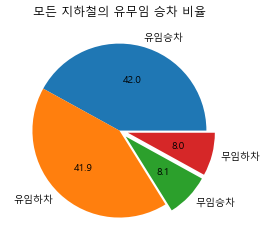

In [47]:
a = np.sum(arr[:,4:8].astype(np.int), axis=0)
plt.rc('font', family='Malgun Gothic')
n = plt.pie(a, labels=df.columns[4:8], autopct='%.1f', explode=[0,0,0.1,0.1])
plt.title('모든 지하철의 유무임 승차 비율')
plt.savefig('all_subway_ratio.png')

모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기
 - 50만명 이상 승차하느 곳만

In [54]:
for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8].astype(np.int)
    유임승차 = 승하차인원[0]
    if 유임승차 > 1000000:
        print(row)
        plt.rc('font', family='Malgun Gothic')
        n = plt.pie(row[4:8], labels=df.columns[4:8], autopct='%.1f', explode=[0,0,0.1,0.1])
        역이름 = row[3]
        파일명 = 'subwas_'+역이름+'.png'
        plt.title(역이름+'역의 유무임 승차 비율')
        plt.savefig(파일명)
        plt.close()

['2019-05' '1호선' 150 '서울역' '1568570' '1489737' '247801' '242107'
 '2019-06-03 10:56:20']
['2019-05' '1호선' 152 '종각' '1204910' '1151371' '176083' '164915'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 202 '을지로입구' '1458984' '1462646' '122625' '113191'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 212 '건대입구' '1378810' '1494957' '105074' '109681'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 214 '강변(동서울터미널)' '1310416' '1289645' '160160' '155742'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 216 '잠실(송파구청)' '2539574' '2462479' '233044' '219947'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 219 '삼성(무역센터)' '1781824' '1842623' '134802' '127716'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 220 '선릉' '1460528' '1300444' '234778' '207100'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 221 '역삼' '1269095' '1438098' '174383' '177850'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 222 '강남' '2894341' '2974378' '192979' '172755'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 226 '사당' '1171893' '1316118' '229867' '219309'
 '2019-06-03 10:56:20']
['2019